In [1]:
import json # to work with json file format
from bs4 import BeautifulSoup # to parse html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_json('data/bigfoot_data.json', lines = True)

In [5]:
df.head()

,_id,html,time,url
0,{'$oid': '5939abbd2acdf6607095366c'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:40 2017,show_report.asp?id=13038
1,{'$oid': '5939abbd2acdf6607095366d'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=8792
2,{'$oid': '5939abbd2acdf6607095366e'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=1255
3,{'$oid': '5939abbd2acdf6607095366f'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=11616
4,{'$oid': '5939abbe2acdf66070953670'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:42 2017,show_report.asp?id=637


In [6]:
df['html'][0]

'\r\n<!doctype html public "-//w3c//dtd html 4.0 transitional//en">\r\n<HTML>\r\n\t<HEAD>\r\n        <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7" />\r\n        <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\r\n    <meta name="KEYWORDS" content="bigfoot, big foot, BigFoot, BFRO, Bigfoot research, sightings database, organizations, Organization, sightings, lists, locations, areas, reports, report, ape, apes, forest, giant, giants, monster, monsters, swamp, creek, Florida, Skunk Ape Florida Skuk Ape, Abominable Snowman, Agogwe, Almasti, Batutut-Borneo, Didi, Dwendi, Kakundakari, Kung-Lu, Mapinguary, Muhalu, sasquatch, sasquach, Sedapa, Orang Pendek, Shiru, Sisimite, Skunk Ape, Tok- Burma, Yeti, Yowie, cryptozoology, animals, strange, glowing eyes, foot prints, cast, tracks, fottprint cast, hairy, beast, mystery, paranormal, ufo, x-files, xfiles, bionic woman, sightings, sighting, IVBC, Byrne, report, howl, scream, primate, everglades, Florida Evergl

In [7]:
soup = BeautifulSoup(df['html'][0], 'html.parser')

In [8]:
soup.get_text()

'\n\n\n\n\n\n\nBFRO Report 13038: Snowmobiler has encounter in deep snow near Potter, AK\n\n\r\n\t\tfunction runLogo() {\r\n\t\t\tvar logo = document.getElementById("logo");\r\n\t\t\tif(logo != null)\r\n\t\t\t{\r\n\t\t\t\tlogo.src=logo.src + \'a;\'\r\n\t\t\t}\r\n\t\t}\r\n\t\t\r\n\t\t\n\n\n\n\n\n\r\n\t\t\t<!--\r\n\t\t\t\tif (document.images) \r\n\t\t\t\t{\r\n\t\t\t\t\tb_Media_Articles = new Image();\r\n\t\t\t\t\tb_Media_Articles.src = "/images/templates/b-Media%20Articles_hl.jpg";\r\n\t\t\t\t\tb_Media_Articles_orig = new Image();\r\n\t\t\t\t\tb_Media_Articles_orig.src = "/images/templates/b-Media%20Articles.jpg";\r\n\t\t\t\t\tb_ReportForm = new Image();\r\n\t\t\t\t\tb_ReportForm.src = "/images/templates/b-Report%20Form_hl.jpg";\r\n\t\t\t\t\tb_ReportForm_orig = new Image();\r\n\t\t\t\t\tb_ReportForm_orig.src = "/images/templates/b-Report%20Form.jpg";\r\n\t\t\t\t\tb_Home = new Image();\r\n\t\t\t\t\tb_Home.src = "/images/templates/b-Home_hl.jpg";\r\n\t\t\t\t\tb_Home_orig = new Image();\r\n

In [9]:
soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE doctype html public "-//w3c//dtd html 4.0 transitional//en">

<html>
<head>
<meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="bigfoot, big foot, BigFoot, BFRO, Bigfoot research, sightings database, organizations, Organization, sightings, lists, locations, areas, reports, report, ape, apes, forest, giant, giants, monster, monsters, swamp, creek, Florida, Skunk Ape Florida Skuk Ape, Abominable Snowman, Agogwe, Almasti, Batutut-Borneo, Didi, Dwendi, Kakundakari, Kung-Lu, Mapinguary, Muhalu, sasquatch, sasquach, Sedapa, Orang Pendek, Shiru, Sisimite, Skunk Ape, Tok- Burma, Yeti, Yowie, cryptozoology, animals, strange, glowing eyes, foot prints, cast, tracks, fottprint cast, hairy, beast, mystery, paranormal, ufo, x-files, xfiles, bionic woman, sightings, sighting, IVBC, Byrne, report, howl, scream, primate, everglades, Florida Everglades, swamp, Gigantopit

In [10]:
cols = ['SUBMITTED', 'TITLE', 'YEAR', 'SEASON', 'MONTH',
                                  'STATE', 'COUNTY', 'LOCATION DETAILS', 'NEAREST TOWN',
                                  'NEAREST ROAD', 'OBSERVED', 'ALSO NOTICED',
                                  'OTHER WITNESSES', 'OTHER STORIES', 'TIME AND CONDITIONS',
                                  'ENVIRONMENT']

# save this for later
# for i, col in enumerate(cols):
#     cols[i] = col.lower()

html_df = pd.DataFrame(columns = cols)
html_df

,SUBMITTED,TITLE,YEAR,SEASON,MONTH,STATE,COUNTY,LOCATION DETAILS,NEAREST TOWN,NEAREST ROAD,OBSERVED,ALSO NOTICED,OTHER WITNESSES,OTHER STORIES,TIME AND CONDITIONS,ENVIRONMENT


In [11]:
for doc in df.html:
    doc_dict = dict()
    souped_doc = BeautifulSoup(doc, 'html.parser')
    spans = souped_doc.find_all('span', {'class': 'field'})
    
    try:
        doc_dict['SUBMITTED'] = spans[0].text
        doc_dict['TITLE'] = spans[1].text
    except:
        continue
        
    for sentence in souped_doc.find_all("p"):
        if any(span in sentence for span in spans):
            text = sentence.text
            #print (text)
            #print('------\n')
            list_info = text.split(': ',1)
            #print(list_info)
            doc_dict[list_info[0]] = list_info[1]
    
    html_df = html_df.append({k:doc_dict[k] for k in cols if k in doc_dict}, ignore_index=True)
    
newcols = []

for col in html_df.columns:
    newcols.append(col.lower())
    
html_df.columns = newcols

In [12]:
print(html_df.shape)
html_df.head()

(4799, 16)


,submitted,title,year,season,month,state,county,location details,nearest town,nearest road,observed,also noticed,other witnesses,other stories,time and conditions,environment
0,"Submitted by witness on Saturday, November...",Snowmobiler has encounter in deep snow near Po...,2004,Winter,February,Alaska,Anchorage County,Up near powerline clearings east of Potter Mar...,Anchorage / Hillside,No real roads in the area,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the...",My two friends were snowmachining behind me bu...,I have not heard of any other incidents in Anc...,Middle of the night. The only light was the he...,"In the middle of the woods, in a clearing cove..."
1,"Submitted by witness on Thursday, June 3, ...",Four nocturnal hikers get pelted with snow nea...,2003,Winter,December,Alaska,Anchorage County,"Few houses on the way, a power relay station. ...",Anchorage,Dowling,"Me and a couple of friends had been bored, whe...","We smelled of colonge and after shave, and one...","4. Me, w-man, warren and sean. We were at my h...",no,"Started at 11, ended at about 3-3:30. Weather ...","A pine forest, with a bog or swamp on the righ..."
2,"Submitted by witness A. M. on Tuesday, Octob...",Creature observed walking back and forth by wi...,1998,Fall,September,Alaska,Bethel County,"45 miles by air west of Lake Iliamna, Alaska i...",NaN,NaN,My hunting buddy and I were sitting on a ridge...,nothing unusual,Scouting for caribou with high quality binocul...,NaN,NaN,Call Iliamna Air taxi for lat & Long of Long L...
3,"Submitted by witness on Friday, May 6, 2005.",Fishermen find footprints east of Egegik,2004,Summer,July,Alaska,Bristol Bay County,"Approximately 95 miles east of Egegik, Alaska....",Egegik,NaN,"To whom it may concern, I am a commercial fish...",Just these foot prints and how obvious it was ...,"One other witness, and he was fishing prior to...","I've only heard of one other story, from an ol...","Approximately 12:30 pm, partially coudy/sunny.","Lake front,creek spit, gravel and sand, alder ..."
4,"Submitted by witness on Monday, November 1...",Campers' encounter just after dark in the Wran...,2000,Summer,June,Alaska,Cordova-McCarthy County,"On the main trail toward the glacier, before t...","Kennikot, Alaska",not sure,My hiking partner and I arrived late to the Ke...,I did hear what appeared to be grunting in the...,"I was the only witness, there was one other in...",None,About 12:00 Midnight / full moon / clear / dim...,This sighting was located at approximately 1 t...


In [13]:
import seaborn as sns

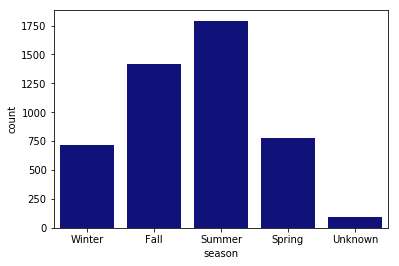

In [14]:
ax = sns.countplot(x="season", data=html_df, color = 'darkblue')

## Basic NLP

In [15]:
observations = html_df.observed.dropna()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_df=1.0, min_df=1,
                             max_features=None)
count_vect.fit(observations)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
#count_vect.vocabulary_

In [18]:
import collections
vocab = collections.Counter(count_vect.vocabulary_)
vocab.most_common(3) # this isn't giving the most common, it's giving the indices, but will save here for later

[('zz', 27663), ('zoos', 27662), ('zooology', 27661)]

In [19]:
X_train_counts = count_vect.transform(observations)
print("The type of X_train_counts is {0}.".format(type(X_train_counts)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts.shape[0], X_train_counts.shape[1]))

The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 4767 rows (documents) and 27664 columns (words).


In [20]:
X_train_counts

<4767x27664 sparse matrix of type '<class 'numpy.int64'>'
	with 531488 stored elements in Compressed Sparse Row format>

In [21]:
doi = 0

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
# just do term frequency at first, use_idf = False
tf_transformer = TfidfTransformer(use_idf=False)
tf_transformer.fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
words_doi_tf = X_train_tf[doi]
print("\nThese are the indices, words, and term frequencies in doc. {0}:".
       format(doi))
tf_lst = []
for i in range(words_doi_tf.count_nonzero()):
    word_index = words_doi_tf.indices[i]
    word = count_vect.get_feature_names()[word_index]
    count = words_doi_tf.data[i]
    tf_lst.append(count)
    print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, count))

mag = np.sqrt(np.sum([tf**2 for tf in tf_lst]))
print("\nThe magnitude of the tf vector for this document is {0:0.3f}".format(mag))
print("It used the L2 norm.")


These are the indices, words, and term frequencies in doc. 0:
73      10            0.130
74      100           0.065
123     11            0.065
145     12            0.065
1988    anchorage     0.065
2470    aside         0.065
2731    away          0.065
3112    bear          0.130
3402    bigfoot       0.065
3495    bit           0.065
3828    bored         0.065
3954    brakes        0.065
4533    came          0.130
6122    continued     0.065
6422    covered       0.065
6536    crazy         0.065
6695    cruising      0.065
6827    cut           0.065
6939    darkness      0.065
6996    days          0.065
7006    dead          0.065
7070    decided       0.065
7120    deep          0.065
7506    didn          0.065
7611    direction     0.065
7640    disappeared   0.065
9450    far           0.065
9573    feet          0.065
9689    figured       0.065
10053   followed      0.065
10059   following     0.065
10340   fresh         0.065
10359   friends       0.194
10461   fun  

In [23]:
# back to the document of interest
print("Document of interest: {0}".format(doi))
nnz_doi = X_train_counts[doi].getnnz(axis=1)
nwords_doi = X_train_counts[doi].sum()
print("There are {0} non-zero word counts in document {1}.".format(nnz_doi[0], doi))
print("There are {0} words in document {1}.".format(nwords_doi, doi))

Document of interest: 0
There are 110 non-zero word counts in document 0.
There are 142 words in document 0.


In [24]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
words_doi_tfidf = X_train_tfidf[doi] 
print("\nThese are the indices, words, and tf-idf values in doc. {0}:".
      format(doi)) 
for i in range(words_doi_tfidf.count_nonzero()): 
    word_index = words_doi_tfidf.indices[i] 
    word = count_vect.get_feature_names()[word_index]
    tfidf = words_doi_tfidf.data[i]
    print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, tfidf))


These are the indices, words, and tf-idf values in doc. 0:
73      10            0.085
74      100           0.057
123     11            0.062
145     12            0.059
1988    anchorage     0.148
2470    aside         0.105
2731    away          0.034
3112    bear          0.084
3402    bigfoot       0.039
3495    bit           0.061
3828    bored         0.106
3954    brakes        0.091
4533    came          0.074
6122    continued     0.057
6422    covered       0.051
6536    crazy         0.069
6695    cruising      0.125
6827    cut           0.070
6939    darkness      0.082
6996    days          0.061
7006    dead          0.064
7070    decided       0.046
7120    deep          0.054
7506    didn          0.039
7611    direction     0.051
7640    disappeared   0.069
9450    far           0.052
9573    feet          0.033
9689    figured       0.072
10053   followed      0.060
10059   following     0.062
10340   fresh         0.076
10359   friends       0.162
10461   fun     

## LDA

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [26]:
conditions = html_df['time and conditions'].dropna()

In [27]:
num_features = 1000

# LDA can only uses raw term counts
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(conditions)

In [28]:
tf_feature_names = tf_vectorizer.get_feature_names() #theses are the words in our bag of words

In [29]:
num_topics = 3

# Run LDA
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online',random_state=0, n_jobs=-1)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=3, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [30]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
00 clear pm 30 night 10 light sunny day bright
Topic 1:
morning clear afternoon early weather late day evening sunny sun
Topic 2:
night dark time clear moon hot cold weather day 11


In [90]:
environment = html_df['environment'].dropna()
location = html_df['location details'].dropna()
other = html_df['other stories'].dropna()
also = html_df['also noticed'].dropna()
observations = html_df['observed'].dropna()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def LDA(data, n_topics, num_features, num_top_words):

    # LDA can only uses raw term counts
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(data)
    
    tf_feature_names = tf_vectorizer.get_feature_names() #theses are the words in our bag of words
    
    # Run LDA
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online',random_state=0, n_jobs=-1)
    lda.fit(tf)
    
    return display_topics(lda, tf_feature_names, num_top_words)

In [48]:
LDA(conditions, 5, 1000, 10)

Topic 0:
clear snow sunny cool warm day ground sky approx hot
Topic 1:
sun just cloudy weather dark clear little evening time conditions
Topic 2:
pm 00 30 11 10 dark night clear approximately time
Topic 3:
day morning afternoon early sunny late clear mid overcast bright
Topic 4:
night clear dark moon light weather cold dusk wind midnight


In [34]:
LDA(environment, 3, 1000, 10)

Topic 0:
forest pine area mountain fir growth feet dense swamp near
Topic 1:
trees river brush ridge heavy high west lots like east
Topic 2:
area wooded woods road creek lake small trees river near


In [35]:
observations = html_df['observed'].dropna()

In [36]:
LDA(observations, 5, 1000, 20)

Topic 0:
trail lake camp creek river water tent rock area decided feet got fishing just forest trees went time day started
Topic 1:
saw just like looked said got thing road time went woods told seen know house didn feet looking ran big
Topic 2:
heard like sound night woods time just hear went area loud noise sounded sounds got away started minutes did house
Topic 3:
road saw creature feet area large hair tall looked like animal head dark did car seen left bear long right
Topic 4:
tracks area heard like foot prints bigfoot sound track inches print time animal human large long did bear snow footprints


## Clustering

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text

data = observations
n_clusters = 3
n_words = 5
custom_stop_words = ['saw','heard','woods','just','did','time','like','road','said','small','area', 'hear', 'went', 'looked']
stopwords = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

def cluster_model(data, n_clusters = 10, n_words = 10, stopwords = 'english'):
    stopwords = text.ENGLISH_STOP_WORDS.union(custom_stop_words)
    
    count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words=stopwords,
                                 analyzer='word', max_df=1.0, min_df=1,
                                 max_features=None)
    count_vect.fit(data)
    word_counts = count_vect.transform(data)

    km = KMeans(n_clusters)
    km.fit(word_counts)
    centroids = np.array(km.cluster_centers_)

    topwords_index = np.zeros((n_clusters,n_words))
    for i in range(centroids.shape[0]):
        topwords_index[i] += centroids[i].argsort()[::-1][:n_words]
    topwords_index = topwords_index.astype(int)
    topiclist = []
    for i in range(topwords_index.shape[0]):
        wordlist = []
        for j in range(topwords_index.shape[1]):
            wordlist.append(count_vect.get_feature_names()[topwords_index[i][j]])
        words = ', '.join(wordlist)
        topiclist.append(words)
    return topiclist

In [96]:
cluster_model(data = observations, n_clusters = 5, n_words = 10)

['night, sound, feet, tree, away, creature, got, went, left, large',
 'went, got, night, looked, feet, away, sound, didn, thought, right',
 'feet, got, mountain, tracks, way, camp, big, came, looked, old',
 'looked, feet, went, large, night, got, creature, tall, seen, away',
 'lake, forest, feet, near, night, summer, tent, kootenay, left, sasquatch']

In [101]:
cluster_model(data = observations, n_clusters = 5, n_words = 10, stopwords = custom_stop_words)

['lake, feet, tracks, left, forest, mr, thought, bear, mountain, night',
 'got, night, feet, away, sound, thought, didn, right, know, started',
 'feet, large, got, creature, night, tall, seen, away, sound, thought',
 'night, sound, tree, feet, got, camp, away, didn, left, trail',
 'old, good, man, feet, got, came, water, rifle, day, way']

In [98]:
cluster_model(data = environment, n_clusters = 5, n_words = 10, stopwords = custom_stop_words)

['ridge, campground, farm, south, land, forest, east, hill, creek, york',
 'wooded, river, pine, lake, near, swamp, land, heavily, mountain, hills',
 'trees, pine, river, lots, lake, forest, creek, brush, large, oak',
 'forest, pine, lake, river, creek, near, dense, mountain, old, lots',
 'creek, wooded, near, river, large, runs, mile, pine, old, heavily']

In [92]:
cluster_model(data = conditions, n_clusters = 5, n_words = 10, stopwords = custom_stop_words)

['night, clear, moon, light, dark, 00, weather, 30, 10, late',
 'clear, weather, morning, pm, sunny, 30, skies, warm, light, 00',
 'day, sunny, clear, afternoon, bright, 00, pm, mid, early, summer',
 'dark, clear, light, 30, weather, 00, pm, night, moon, evening',
 '30, 00, morning, pm, afternoon, early, light, sunny, 10, weather']

In [49]:
cluster_model(data = location, n_clusters = 10, n_words = 10, stopwords = custom_stop_words)

['near, river, county, lake, creek, park, location, south, miles, route',
 'miles, north, south, east, west, highway, hwy, left, right, creek',
 'miles, north, hwy, south, west, east, river, mile, rd, creek',
 'location, lake, county, river, creek, park, rd, south, right, state',
 'miles, east, turner, highway, 41, ochopee, north, collier, county, florida',
 'right, left, turn, rd, miles, mile, follow, north, hwy, creek',
 'highway, miles, north, south, west, east, mile, county, river, right',
 'lake, miles, trail, north, east, west, right, highway, mile, turn',
 'creek, bluff, service, campsite, forest, south, map, west, north, mile',
 'turn, right, rte, miles, west, south, left, east, follow, ny']

In [91]:
cluster_model(data = also, n_clusters = 5, n_words = 10, stopwords = custom_stop_words)

['smell, sounds, night, day, deer, creature, tracks, unusual, seen, animal',
 'yard, went, dogs, fence, thing, porch, point, night, thought, going',
 'husband, left, trees, felt, got, way, people, heading, went, large',
 'large, deer, ve, bigfoot, foot, remember, night, tree, creature, day',
 'tree, went, feet, sound, night, large, looked, seen, house, animal']

In [85]:
submittedyear = []
for i in range(len(html_df.submitted)):
    submittedyear.append(html_df.submitted[i][-5:][:4])
#submittedyear

In [69]:
html_df.submitted[0][-5:][:4]

'2005'

In [80]:
html_df['other stories'][60]

'In 1986 me and a friend were walking on a trail and came up on three sets of tracks coming up a trail where a house was at one time and there was plum and peach trees that were missing fruit and a lot of the limbs were broken. '

3383

In [84]:
html_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 16 columns):
submitted              4799 non-null object
title                  4799 non-null object
year                   4799 non-null object
season                 4799 non-null object
month                  4181 non-null object
state                  4540 non-null object
county                 4540 non-null object
location details       4047 non-null object
nearest town           4440 non-null object
nearest road           4086 non-null object
observed               4767 non-null object
also noticed           3185 non-null object
other witnesses        4325 non-null object
other stories          3383 non-null object
time and conditions    4292 non-null object
environment            4517 non-null object
dtypes: object(16)
memory usage: 600.0+ KB


In [87]:
cluster_model(data = other, n_clusters = 3, n_words = 10, stopwords = custom_stop_words)

['years, bigfoot, seen, told, sighting, yes, people, sightings, friend, creature',
 'yes, sightings, stories, know, people, read, reports, site, sighting, report',
 'told, night, years, went, house, man, large, know, got, seen']

In [108]:
states = html_df.state.unique()

In [119]:
states

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan',
       'Minnesota', 'Missouri', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming', nan], dtype=object)

In [126]:
enviroments_by_state = []

for state in states:
    enviroments_by_state.append(html_df[html_df.state == state]['environment'].dropna())

In [136]:
environment_words_by_state = dict()

for st in range(len(states)):
    try:
        environment_words_by_state[states[st]] = cluster_model(data = enviroments_by_state[st], n_clusters = 1, n_words = 10, stopwords = custom_stop_words)
    except:
        continue

In [137]:
environment_words_by_state

{'Alaska': ['birch, forest, trees, hill, pine, mountains, creek, miles, located, sighting'],
 'Alabama': ['pine, creek, trees, wooded, river, forest, near, lake, swampy, large'],
 'Arkansas': ['trees, creek, pine, wooded, lake, forest, river, miles, hills, near'],
 'Arizona': ['forest, pine, trees, desert, ponderosa, scrub, feet, canyon, lots, oak'],
 'California': ['forest, pine, trees, creek, lake, river, lots, near, mountain, oak'],
 'Colorado': ['pine, forest, mountain, trees, aspen, feet, creek, near, rocky, elevation'],
 'Connecticut': ['large, areas, hills, swampy, extremely, edge, early, land, hilly, heavily'],
 'Delaware': ['land, forrest, forest, farm, flat, coastal, connects, country, creek, creeks'],
 'Florida': ['pine, swamp, forest, wooded, trees, river, near, swampy, land, areas'],
 'Georgia': ['pine, creek, forest, wooded, swamp, trees, mountain, creeks, near, river'],
 'Iowa': ['river, wooded, forest, large, near, field, creek, week, south, land'],
 'Idaho': ['pine, fo

In [131]:
environment_words_by_state['AK'] = cluster_model(data = enviroments_by_state[0], n_clusters = 1, n_words = 10, stopwords = custom_stop_words)

In [122]:
cluster_model(data = enviroments_by_state[16], n_clusters = 1, n_words = 10, stopwords = custom_stop_words)

['pine, forest, trees, swamp, creeks, hardwood, lake, bayou, swampy, dense']

In [120]:
states[16]

'Louisiana'